In [1]:
import pandas as pd
import csv
import os

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension: provaNewFirms
Current folders are:
provaNewFirms.0


In [2]:
names=["_total_production_","_total_cost_of_production_","_total_cost_of_unused_factors_",
       "_total_inventories_","_total_in_progress_inventories_","_total_lost_production_",
       "_total_cost_of_lost_production_","_updatedLabor_","_updatedCapital_", "total_capQ_dynamic_"]

In [3]:
# series database
series={}
for name in names:
    k=0
    #which folder
    os.chdir("../"+folder+"."+str(k))
    #create the dataframe with the content of the folder with extension 0 (k value here)
    #for the 'name' series
    series[name]=pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None)

    for k in range(1,rankNum):   #add the same series from the other folders
        #which folder
        os.chdir("../"+folder+"."+str(k))
        series[name]=series[name].add(pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None))

'_total_production_'

,0,1,2,3,4
0,42.958621,61.036412,36.803369,39.874429,6.505627
1,89.766346,108.278927,94.538373,76.583089,2.966691
2,116.750034,160.923085,117.303424,29.092354,3.323749
3,140.589760,206.549918,134.346510,38.652231,5.287278
4,177.799590,227.859772,155.972719,30.032486,4.931300
...,...,...,...,...,...
139,247.162382,315.639949,610.922357,603.986680,38.823794
140,248.694998,320.021481,615.277076,325.971507,55.743305
141,247.670370,321.996288,592.262604,552.384697,28.095688
142,247.085931,319.779485,587.874528,337.370679,39.870874


'____________________________________________________________'

'_total_cost_of_production_'

,0,1,2,3,4
0,155.833333,209.805556,128.888889,104.069444,24.694444
1,325.833333,371.583333,324.444444,201.083333,12.347222
2,425.000000,551.055556,404.444444,77.611111,14.111111
3,521.333333,707.777778,462.222222,100.541667,17.638889
4,663.000000,778.555556,537.777778,81.138889,17.638889
...,...,...,...,...,...
139,929.333333,1102.111111,2022.222222,1541.638889,127.000000
140,937.833333,1109.694444,2037.777778,837.847222,178.152778
141,932.166667,1114.750000,1957.777778,1411.111111,93.486111
142,929.333333,1102.111111,1942.222222,867.833333,127.000000


'____________________________________________________________'

'_total_cost_of_unused_factors_'

,0,1,2,3,4
0,801.463522,745.927395,911.584172,1734.809403,161.465118
1,631.463522,584.149617,716.028617,1637.795515,173.812340
2,532.296856,404.677395,636.028617,1761.267737,172.048451
3,435.963522,247.955173,578.250839,1738.337181,168.520673
4,294.296856,177.177395,502.695283,1757.739959,168.520673
...,...,...,...,...,...
139,75.713157,77.134460,295.313502,3891.406131,225.767782
140,71.667898,69.056082,277.975431,4588.593869,173.907611
141,83.223207,71.479000,354.128776,3901.739049,250.818738
142,85.375665,82.224898,373.298356,4449.126869,217.092345


'____________________________________________________________'

'_total_inventories_'

,0,1,2,3,4
0,0.000000,0.000000,0.000000,135.290278,27.163889
1,0.000000,0.000000,0.000000,300.068242,19.758810
2,0.000000,0.000000,509.333333,187.502752,22.696955
3,0.000000,0.000000,398.070862,180.795834,24.567118
4,552.500000,377.902778,838.438246,171.247963,22.180860
...,...,...,...,...,...
139,1396.017356,1387.168957,2609.220762,2752.922780,185.861780
140,1640.932598,2182.581400,3781.452858,1880.729885,239.853015
141,1430.229881,2011.540151,2763.910890,2260.710892,175.332088
142,1438.043737,2296.701379,3498.725751,1761.072819,175.546345


'____________________________________________________________'

'_total_in_progress_inventories_'

,0,1,2,3,4
0,202.583333,272.747222,154.666667,0.0,0.0
1,626.166667,755.805556,544.000000,0.0,0.0
2,1178.666667,1472.177778,520.000000,0.0,0.0
3,1856.400000,2392.288889,840.000000,0.0,0.0
4,2165.800000,3026.508333,781.333333,0.0,0.0
...,...,...,...,...,...
139,4129.016667,5182.197222,2800.000000,0.0,0.0
140,4029.566667,4774.719444,2112.000000,0.0,0.0
141,4143.750000,5017.891667,2722.666667,0.0,0.0
142,4423.683333,4689.280556,2221.333333,0.0,0.0


'____________________________________________________________'

'_total_lost_production_'

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
139,0,0,0,0,0
140,0,0,0,0,0
141,0,0,0,0,0
142,0,0,0,0,0


'____________________________________________________________'

'_total_cost_of_lost_production_'

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
139,0,0,0,0,0
140,0,0,0,0,0
141,0,0,0,0,0
142,0,0,0,0,0


'____________________________________________________________'

'_updatedLabor_'

,0,1,2,3,4
0,364.0,371.0,506.0,835.0,102.0
1,364.0,371.0,506.0,835.0,102.0
2,364.0,371.0,506.0,835.0,102.0
3,364.0,371.0,506.0,835.0,102.0
4,364.0,371.0,506.0,835.0,102.0
...,...,...,...,...,...
139,337.0,455.0,991.0,2891.0,196.0
140,337.0,463.0,988.0,2782.0,189.0
141,337.0,463.0,988.0,2782.0,189.0
142,337.0,463.0,988.0,2782.0,189.0


'____________________________________________________________'

'_updatedCapital_'

,0,1,2,3,4
0,38833.975999,38273.429493,34983.691269,65708.433677,5508.625884
1,38833.975999,38273.429493,34983.691269,65708.433677,5508.625884
2,38833.975999,38273.429493,34983.691269,65708.433677,5508.625884
3,38833.975999,38273.429493,34983.691269,65708.433677,5508.625884
4,38833.975999,38273.429493,34983.691269,65708.433677,5508.625884
...,...,...,...,...,...
139,44018.262385,47372.761729,86711.119110,165956.144124,10214.861838
140,44403.700817,47338.625483,86655.701688,165655.646849,10165.408281
141,44359.134438,47214.720583,86892.256059,165924.667768,10151.498965
142,44493.639571,47099.116295,86799.503013,165703.435934,10159.649627


'____________________________________________________________'

'total_capQ_dynamic_'

,0,1,2,3,4
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
139,17.237734,8.595102,14.082810,20.943864,0.722708
140,20.014358,8.538390,15.833285,24.672607,0.622132
141,7.639244,5.931889,24.277432,41.105009,1.641522
142,12.816063,6.147351,14.788500,26.961746,2.277565


'____________________________________________________________'

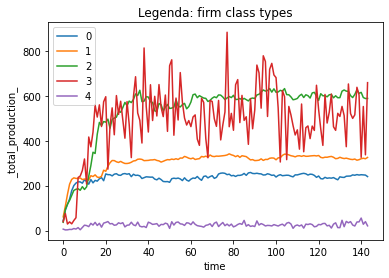

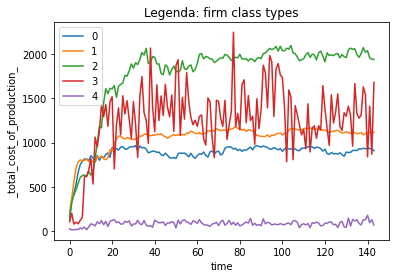

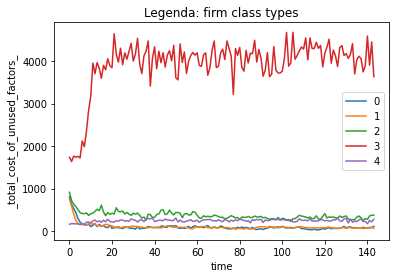

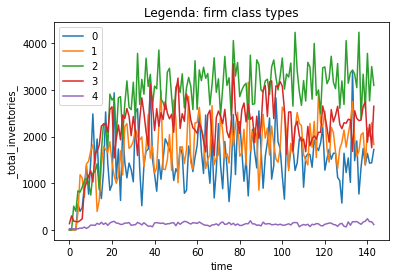

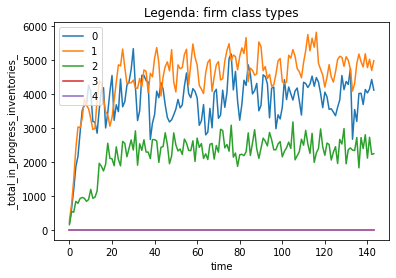

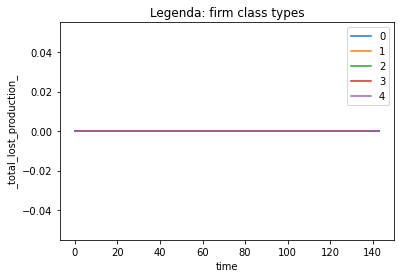

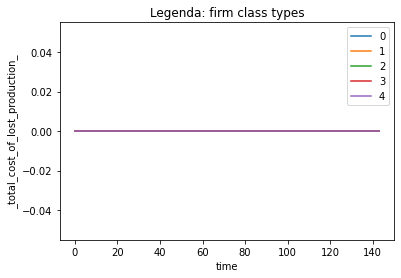

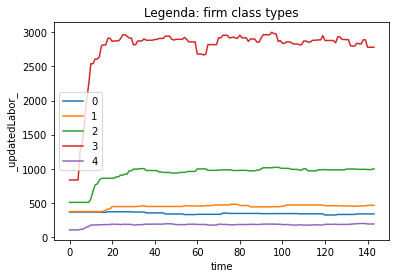

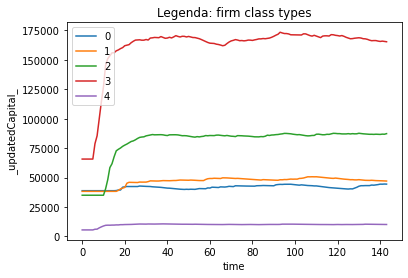

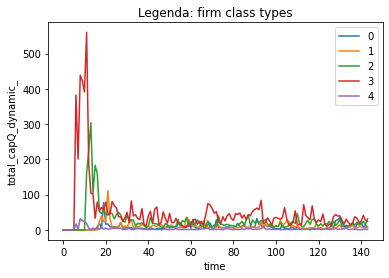

In [4]:
for name in names:
    display(name)
    display(series[name])
    display("____________________________________________________________")
    series[name].plot(title="Legenda: firm class types",xlabel="time",ylabel=name)